In [1]:
import pandas as pd

In [4]:
data_dir = '/Users/kaushikrajnadar/Downloads/AttentionMOI-master/AttentionMOI/example'

label_df = pd.read_csv(f'{data_dir}/label.csv', )
label_df.columns.values[0] = 'subject'

cnv_df = pd.read_csv(f'{data_dir}/cnv.csv.gz')
cnv_df.columns.values[0] = 'subject'

exp_df = pd.read_csv(f'{data_dir}/rna.csv.gz')
exp_df.columns.values[0] = 'subject'

met_df = pd.read_csv(f'{data_dir}/met.csv.gz')
met_df.columns.values[0] = 'subject'


In [5]:
dfs = [label_df, cnv_df, exp_df, met_df]
suffixes = ['', '_cnv', '_exp', '_met']

for i, df in enumerate(dfs):
    df.columns = [col if col == 'subject' else col + suffixes[i] for col in df.columns]

merged = dfs[0]
for df in dfs[1:]:
    merged = merged.merge(df, on='subject')

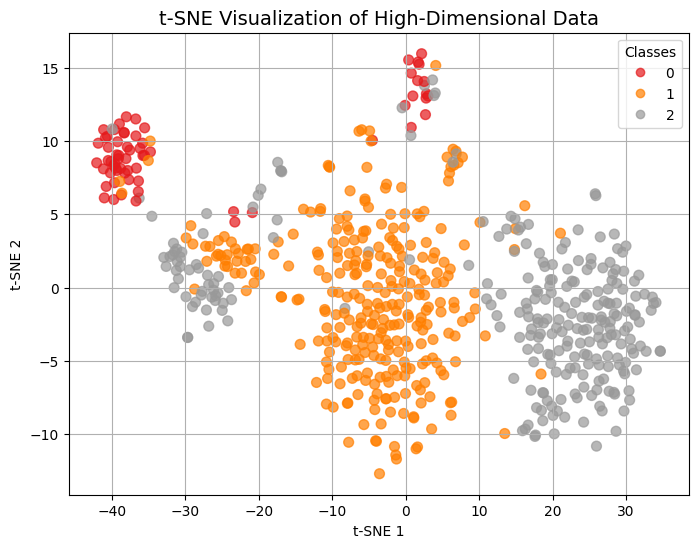

In [14]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Example: replace with your actual DataFrame
# df = pd.read_csv('your_data.csv')

# --- Step 1: Separate features and labels (if you have them) ---
# Suppose 'label' is your target column; adjust accordingly
X = merged.drop(columns=['label', 'subject'], errors='ignore').fillna(0)
y = merged['label'] if 'label' in merged.columns else None

# --- Step 2: Standardize the features ---
X_scaled = StandardScaler().fit_transform(X)

# --- Step 3: Apply t-SNE ---
tsne = TSNE(
    n_components=2,       # 2D visualization
    perplexity=30,        # adjust based on sample size
    max_iter=1000,          # number of iterations
    learning_rate='auto',
    init='pca',
    random_state=42
)
X_embedded = tsne.fit_transform(X_scaled)

# --- Step 4: Plot the results ---
plt.figure(figsize=(8, 6))
if y is not None:
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y,cmap='Set1', s=50, alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Classes")
else:
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=50, alpha=0.7)

plt.title("t-SNE Visualization of High-Dimensional Data", fontsize=14)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()